 <img src='dnd.png' width = 400 height = 300 > 
    


# Dungeons and Dragons Monsters Project

## Objectives and Background for Projects
As a rpg enthusiast and player, the possibility of perfom a simple analysis on D&D is something that really makes my day. Dungeons and Dragons has a huge playerbase and one of the biggest crowndfunding campaign ever on the website Kickstarter, with Critical Role - Legend of Vox Machina, currently streaming on Amazon Prime Video.

The Dungeons and Dragons rpg was first published in 1974. Below an extract from the Wizards of the Coast website.

"Dungeons & Dragons influenced so many games that followed in different media and genres, but it has remained a vital product in its own right, appearing in diverse editions, media, and languages, as well as spinning off into literature, film, television, and the Internet. It has been a source of inspiration for artists of many kinds, but more importantly it has enriched the lives of tens of millions around the globe, offering a chance for anyone to experience fantastic roles and situations very different from everyday life. On the occasion of the 40th anniversary of Dungeons & Dragons, and the release of an eagerly-awaited new edition, this timeline shows some important dates in the development, elaboration, and the triumph of Dungeons & Dragons." [WoTC](https://dnd.wizards.com/dungeons-and-dragons/what-dd/history/history-forty-years-adventure)

### Objective
The main objective of this project is to show the ability to perform an api connection with a site, in this case [Open_5e](https://api.open5e.com/) and after downloading the information, do an exploratory data analysis, connect and upload the data to a dataframe on Amazon Web Service (AWS), creating a pipeline



In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import own function
from dnd_db import *
from sql_functions import * 

# For Database
import psycopg2 as ps


The columns of the dataset has informations about the name, size, tye, alignment, monster stats(strength, dexterity, wisdow, intelligence and charisma), resistances, immunities, challenge rating(cr) and the legendary action perform by the monster

In [2]:
monster_df = monster_dnd_dataframe()


### Data Pre processing

In order to make analysis on the dataset, I'll make these following changes:

- Verify the data to see the types of objects and if its necessary, change object/categorical values to numeric is cases that it makes more sense.
- The size column of the dataframe which is categorical can be map to numeric, so I'll create the size_m column that has the median value of the size for each type, except for the Tiny and Gargantuan, which I map to 0.6 and 10 m, respectively:
    1. Tiny: shorter than 0.6m
    2. Small: between 0.6m & 1.20m feet
    3. Medium: between 1.20m & 2.43m feet
    4. Large: between  2.43m & 4.57m feet
    5. Huge: between 4.57m & 9.14m feet
    6. Gargantuan: taller than 9.14m feet

- The other pre processing that I will do, is to change the cr which stands for chagellenge rate, from object to numeric. But in order to do this effectively I need to replace values like 1/8, 1/4 and 1/2 for their values decimal values 0.125, 0.25, 0.5, respectively. Because if we don't do this the values will be change to NaN.

- And finally the last thing that I'll do is to change the different humanoid types and merge them into one type which is humanoid


The code below just shows the types of variables present in each column. As we can see the cr values is listed as object so I'll perform he changes cited above.

In [31]:
monster_df.to_csv('dnd_monster_dataframe.csv')

In [3]:
monster_df.dtypes

name               object
size               object
types              object
subtype            object
alignment          object
armor_class         int64
hit_points          int64
str_stats           int64
dex_stats           int64
con_stats           int64
int_stats           int64
wis_stats           int64
cha_stats           int64
dmg_vul            object
dmg_resist         object
dmg_immun          object
condition_immun    object
cr                 object
legendary_desc     object
dtype: object

### Data Transformation

In order to change the values in the cr column, I'll create a dictionary that maps the fraction values to decimals values, the it will be use to replace thoses values in the dataframe.

The next step is to changes the values to numeric.

In [4]:
map_float = {'1/2': '0.5', '1/4': '0.25','1/8':'0.125', }  #dictionary mapping fraction to decimals
monster_df['cr'] = monster_df['cr'].replace(map_float)

In [5]:
monster_df['cr'] = monster_df['cr'].apply(pd.to_numeric, errors = 'coerce') #function to change the categorical values to numeric

Next I create a dictionary that map the categorical values in the size columns for the numeric values. Then I create a columns in the dataframe called size_m that holds the numeric values

In [6]:
sizes_meters = {'Tiny' : 0.6, 'Small' : 0.9, 'Medium': 1.80, 'Large' : 3.50, 'Huge' : 6.86, 'Gargantuan' : 10.0} #dictionary mapping the size category to numeric
monster_df['size_m'] = monster_df['size'].map(sizes_meters) #create the size_m columns with the numeric values for the sizes

In [7]:
monster_df # dataframe modified and pre processed

,name,size,types,subtype,alignment,armor_class,hit_points,str_stats,dex_stats,con_stats,int_stats,wis_stats,cha_stats,dmg_vul,dmg_resist,dmg_immun,condition_immun,cr,legendary_desc,size_m
0,Aatxe,Large,celestial,shapechanger,lawful good,14,105,22,12,20,10,14,14,,,,"charmed, frightened",5.00,"The aatxe can take 3 legendary actions, choosi...",3.50
1,Aboleth,Large,aberration,,lawful evil,17,135,21,9,15,18,15,18,,,,,10.00,"The aboleth can take 3 legendary actions, choo...",3.50
2,"Aboleth, Nihilith",Large,undead,,chaotic evil,17,135,21,9,15,18,15,18,,"acid, fire, lightning, thunder (only when in e...","cold, necrotic, poison; bludgeoning, piercing ...","charmed, exhaustion, frightened, grappled, par...",12.00,"A nihileth can take 3 legendary actions, choos...",3.50
3,Abominable Beauty,Medium,fey,,neutral evil,18,187,17,18,18,17,16,26,,,fire,,11.00,,1.80
4,Accursed Defiler,Medium,undead,,neutral evil,12,75,19,14,17,6,15,14,,"necrotic; bludgeoning, piercing, and slashing ...",poison,"charmed, exhaustion, frightened, poisoned",4.00,,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,Zmey,Huge,dragon,,chaotic evil,18,189,22,13,19,16,16,12,,"cold, fire",,"paralyzed, unconscious",14.00,"The zmey can take 1 legendary action per head,...",6.86
1082,Zmey Headling,Medium,dragon,,chaotic evil,16,105,16,10,1,8,16,8,,"cold, fire",,"paralyzed, unconscious",5.00,,1.80
1083,Zombie,Medium,undead,,neutral evil,8,22,13,6,16,3,6,5,,,,poisoned,0.25,,1.80
1084,Zoog,Tiny,aberration,,chaotic evil,13,3,3,16,12,11,10,8,,,,,0.00,,0.60


Creating the humanoid dictionary so I can replace those different names for humanoid creatures, into one category which is humanoid.

In [8]:
humanoid = {'humanoid (any race)': 'humanoid',
            'Humanoid (any race)': 'humanoid',
            'Humanoid': 'humanoid', 
            'humanoids':'humanoid',
            'humanoid (shadow fey)': 'humanoid',
            'Humanoid (Any Race)': 'humanoid',
            'humanoid (shapechanger':'humanoid'
           }
map_float = {'1/2': '0.5', '1/4': '0.25','1/8':'0.125', }  #dictionary mapping humanoid types 
monster_df['types'] = monster_df['types'].replace(humanoid)

In [9]:
monster_df

,name,size,types,subtype,alignment,armor_class,hit_points,str_stats,dex_stats,con_stats,int_stats,wis_stats,cha_stats,dmg_vul,dmg_resist,dmg_immun,condition_immun,cr,legendary_desc,size_m
0,Aatxe,Large,celestial,shapechanger,lawful good,14,105,22,12,20,10,14,14,,,,"charmed, frightened",5.00,"The aatxe can take 3 legendary actions, choosi...",3.50
1,Aboleth,Large,aberration,,lawful evil,17,135,21,9,15,18,15,18,,,,,10.00,"The aboleth can take 3 legendary actions, choo...",3.50
2,"Aboleth, Nihilith",Large,undead,,chaotic evil,17,135,21,9,15,18,15,18,,"acid, fire, lightning, thunder (only when in e...","cold, necrotic, poison; bludgeoning, piercing ...","charmed, exhaustion, frightened, grappled, par...",12.00,"A nihileth can take 3 legendary actions, choos...",3.50
3,Abominable Beauty,Medium,fey,,neutral evil,18,187,17,18,18,17,16,26,,,fire,,11.00,,1.80
4,Accursed Defiler,Medium,undead,,neutral evil,12,75,19,14,17,6,15,14,,"necrotic; bludgeoning, piercing, and slashing ...",poison,"charmed, exhaustion, frightened, poisoned",4.00,,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,Zmey,Huge,dragon,,chaotic evil,18,189,22,13,19,16,16,12,,"cold, fire",,"paralyzed, unconscious",14.00,"The zmey can take 1 legendary action per head,...",6.86
1082,Zmey Headling,Medium,dragon,,chaotic evil,16,105,16,10,1,8,16,8,,"cold, fire",,"paralyzed, unconscious",5.00,,1.80
1083,Zombie,Medium,undead,,neutral evil,8,22,13,6,16,3,6,5,,,,poisoned,0.25,,1.80
1084,Zoog,Tiny,aberration,,chaotic evil,13,3,3,16,12,11,10,8,,,,,0.00,,0.60


#  Exploratory Data Analysis

Now we can plot some charts and see what informations could be interesting to know.

The first thing that I'll do is a histogram to see what sizes has the biggest population.

As we can the most commom size is the medium, followed by the large size. This could be reflected in the gameplay, if we are using a standard world creation, the players has a bigger chance to encounter a medium/large creature, than a tiny one, for example.

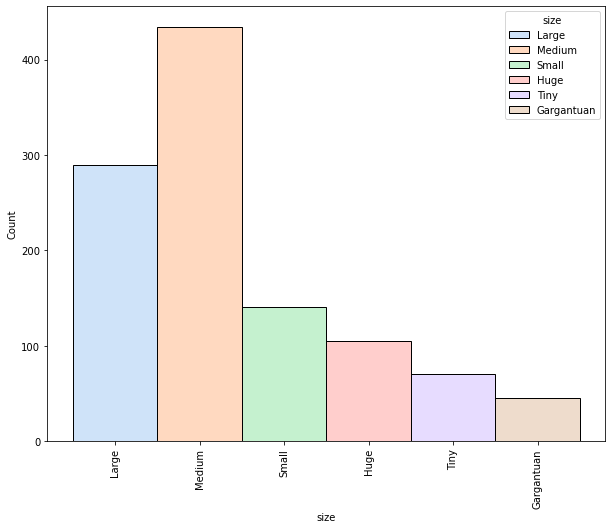

In [10]:
hist_plot(monster_df, 'size', 'size')

Some things seems easier to see some kind of relation, like the Strength stats of a creature and his size, but if we look closer, we can see that the distribuition vary along a great range of values, like for huge creatures the strength vary between 0 and 30, but if we look for the median values they are really increasing with the size.

The same goes for the Constitution stats, when increasing the size we are increasing in constitution, this is also kind of what we could expect, but if we look for something like Dexterity, intuitively we could think that larger creatures would have lower dexterity and smaller creatures a higher value.

However this is not true, as we can see in the chart the median of the dexterity values are almost the same for each size.


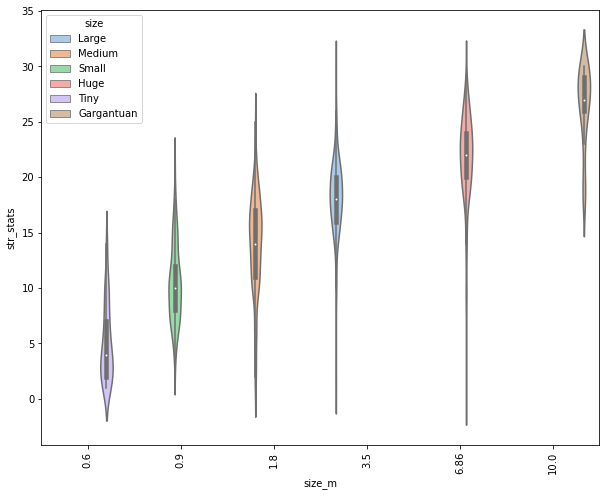

In [11]:
violin_plot(monster_df, 'size_m','str_stats', 'size')

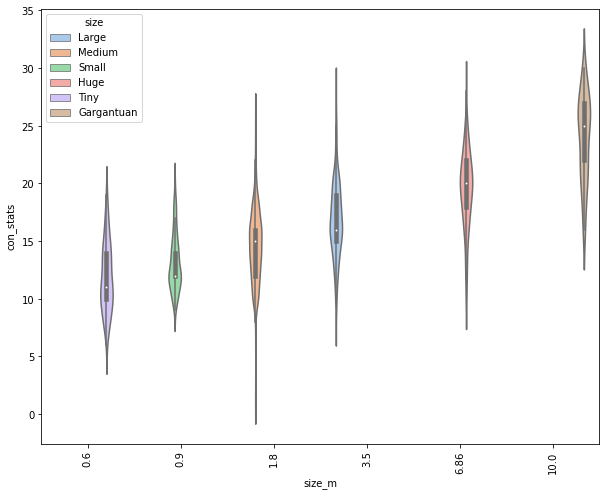

In [12]:
violin_plot(monster_df, 'size_m','con_stats', 'size')

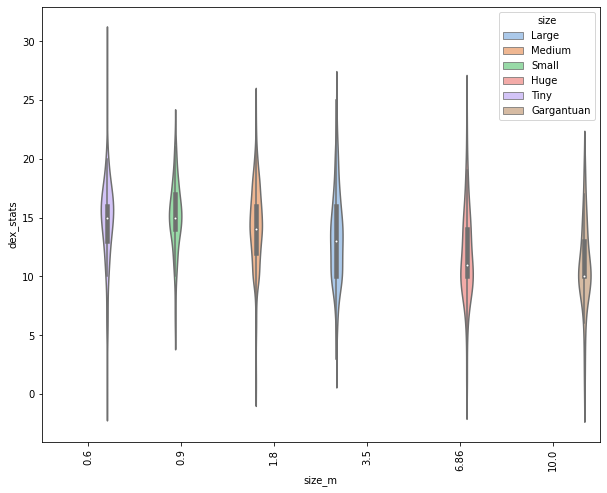

In [13]:
violin_plot(monster_df, 'size_m','dex_stats', 'size')

<img src = 'combat.jpg' width = 400 height = 300>


What about the Challenge Rating of a creature? 

What we could expect in a combat if we fight against a creature with different size than us?

Again, intuitively, we could think that the greater the creature the greater the challenge, after all if we challenge a giant or a dragon we would anticipate some difficult. But as we can see, although the size seems to increment the challenge we have a large variety of values. That doesn't mean that we can't make some conclusions here! Some conclusions that could be get:
1. Tiny creatures doesn't have a cr greater than 10
2. Small creatures can't have a chanllenge greater than 15
3. Gargantuans couldn't have a cr smaller than 5

One thing that needs to made clear, is that this values are for alone creatures or in some cases a swarm of creatures, what happens some times in D&D is that we can encounter more than one of the same creature at a time, so this will change the CR value of that encounter and some times a creature with lower cr alone, could be really difficult as a group. For example:
- An Ancient Red Dragon has a CR of 24 and Zmey a CR of 14, but if we encounter 3 Zmeys the CR is the same as the Ancient Red Dragon.

So planning your encounters in D&D is really important for a fair combat!

Another thing that is related to the Challenge Rating is the number of hit_points, which is hits we need to do in order to kill the creature. As we can see the number of hit points increases with the challenge rating of a creature. And finally we can also see that the number of hit_points also increases with the size of the creature.

So if you want to defeat Mechuiti, Demon Lord Of Apes that inhabits Bloodskull island and stop his revenge, you can expect a great challenge!!

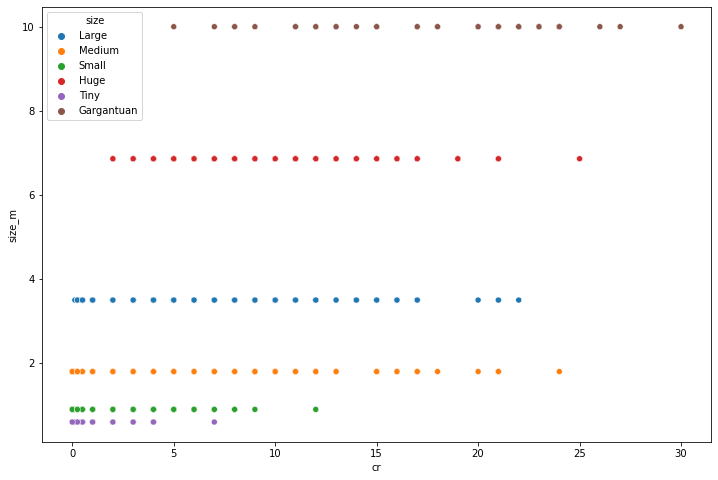

In [14]:
scatter_plot(monster_df,'cr','size_m','size')

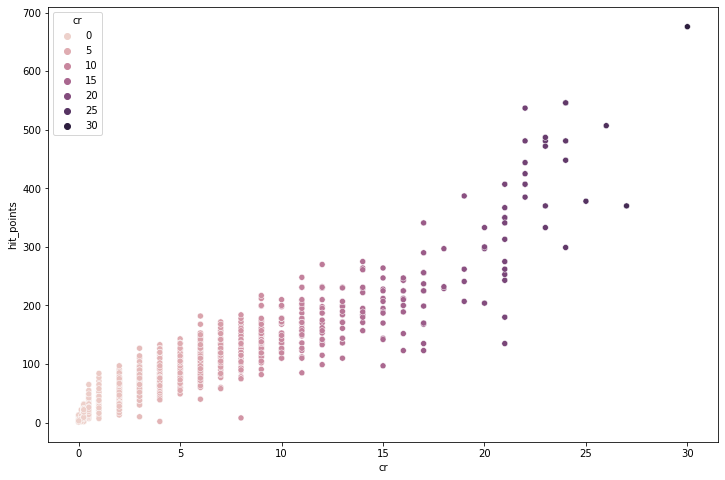

In [15]:
scatter_plot(monster_df,'cr','hit_points', 'cr')

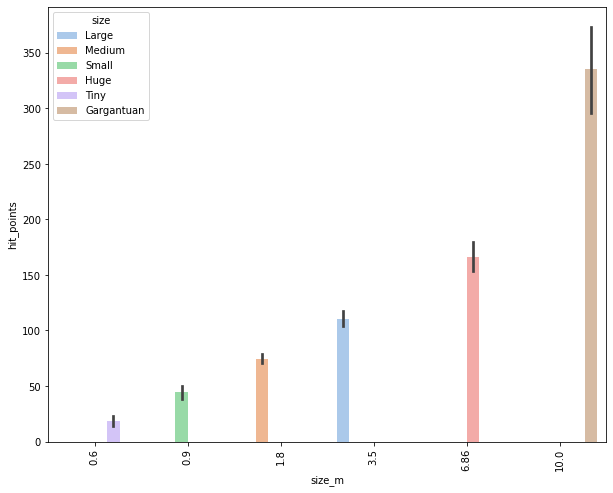

In [16]:
bar_plot(monster_df, 'size_m', 'hit_points','size')

# Dragons
<img src=tiamat2.png width = 550 height = 450>


One of the most common creature that comes to mind when talking about medieval fantasy, is the Dragons. Even the name of the game is Dungeons & Dragons. Dragons appears in almost every mithology that we have, and they could have really interesting effects on each D&D campaign. Some of the Gods in D&D are know to have the form of Dragons, like Tiamat/Takhisis shown above.

Dragons have different colours, and each color represents a spectrum of their power: Red dragons are the ones that spit fire, Green dragons breath poison, Blue dragons breath lightning, etc. They could be within any alignment from lawful good to lawful evil. Usually the metallic dragons, like Golden, Bronze and Silver are the archetype of the Good ones.

There are some characteristics that differ between types of dragon like creatures:
* Drakes - Drakes are creatures that resemble dragons, but have no wings. Usually they are considered a born failure due their lack of wings. They have strong and muscular limbs and can be on two legs, although they prefer to be on four. Unlike Dragons, Drakes can't breath weapons.
* Pseudodragons - Pseudodragons resemble cat sized red dragons with a sinuous stinger at the end of their tail. Their colour varies between lush scarlet, deep burgundy and fire orange. They stand in a quadruped stance, but have articulate hands.
* Wyrmlings - They are Dragons that are in the age of 5 or less, they have all the abilities of the young and adult ones, but are less powerfull.
* Wyverns - Resembles the type know as True Dragons, but they lack the forelegs and are usually more "stupids" than True Dragons, they also have in poisonous and deadly stingers on his tails. Unlike Dragons, Wyverns can't breath weapons.
* Dragons - Dragons are winged reptilians with four limbs and two wings. They are known and feared for their predatory behavior, cunning, wit, and greed. The oldest dragons are regarded as some of the most powerful creatures in the world. Dragons are magical creatures and are made up of two categories: chromatic and metallic dragons.They are known by their greed and great treasures, they can live for thousands of years growing stronger and stronger.  



So lets do some exploratory analysis on this fearsome and beloved creatures.



In [17]:
dragons_df = monster_df[monster_df['types']=='dragon']
dragons_df 

,name,size,types,subtype,alignment,armor_class,hit_points,str_stats,dex_stats,con_stats,int_stats,wis_stats,cha_stats,dmg_vul,dmg_resist,dmg_immun,condition_immun,cr,legendary_desc,size_m
7,Adult Black Dragon,Huge,dragon,,chaotic evil,19,195,23,14,21,14,13,17,,,acid,,14.0,"The dragon can take 3 legendary actions, choos...",6.86
8,Adult Blue Dragon,Huge,dragon,,lawful evil,19,225,25,10,23,16,15,19,,,lightning,,16.0,"The dragon can take 3 legendary actions, choos...",6.86
9,Adult Brass Dragon,Huge,dragon,,chaotic good,18,172,23,10,21,14,13,17,,,fire,,13.0,"The dragon can take 3 legendary actions, choos...",6.86
10,Adult Bronze Dragon,Huge,dragon,,lawful good,19,212,25,10,23,16,15,19,,,lightning,,15.0,"The dragon can take 3 legendary actions, choos...",6.86
11,Adult Cave Dragon,Huge,dragon,,neutral evil,18,243,26,12,24,12,12,20,,,"acid, poison, thunder",poisoned,16.0,"The dragon can take 3 legendary actions, choos...",6.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,Young Wasteland Dragon,Large,dragon,,chaotic evil,18,178,21,10,21,12,11,12,,,force,,9.0,,3.50
1075,Young White Dragon,Large,dragon,,chaotic evil,17,133,18,10,18,6,11,12,,,cold,,6.0,,3.50
1076,Young Wind Dragon,Large,dragon,,chaotic neutral,17,150,20,19,18,14,13,16,,,lightning,"charmed, exhausted, paralyzed, restrained",6.0,,3.50
1081,Zmey,Huge,dragon,,chaotic evil,18,189,22,13,19,16,16,12,,"cold, fire",,"paralyzed, unconscious",14.0,"The zmey can take 1 legendary action per head,...",6.86


In [32]:
dragons_df.to_csv('dnd_dragons_dataframe.csv')

Dragons are known to have a high value of charisma, wisdow and strength, so let see the top 10 dragons for each one of this categories.

- As we can se the most wised dragon is the Ancient Mithral, which has a neutral alignment
- The most charismatic dragon is the Ancient Golden Dragon
- For the strength we have a tie between the Ancient Dragon, the Ancient Silver Dragon and the Ancient Red Dragon, which is a chaotic evil dragon
- We can also seem, that the Ancient Mithral dragon has high values in all the categories.
- Powerful in both Strength and Charisma the Ancient Golden Dragon is a Lawful Good creature, that any adventurer will be blessed to see.



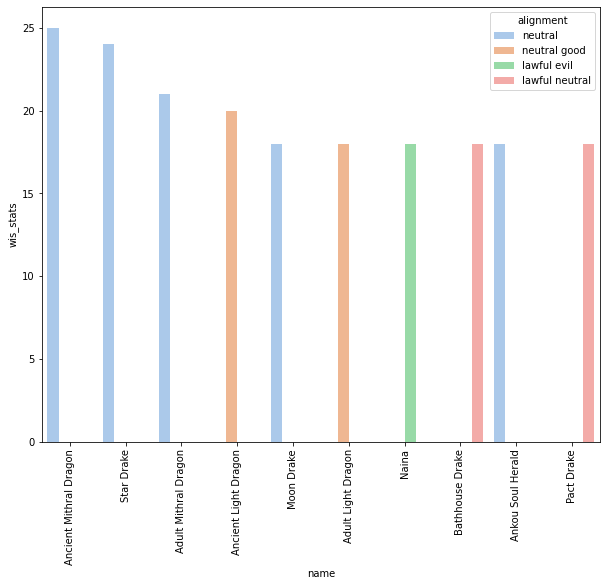

In [18]:
bar_plot(dragons_df.sort_values('wis_stats', ascending = False)[0:10],'name', 'wis_stats','alignment')

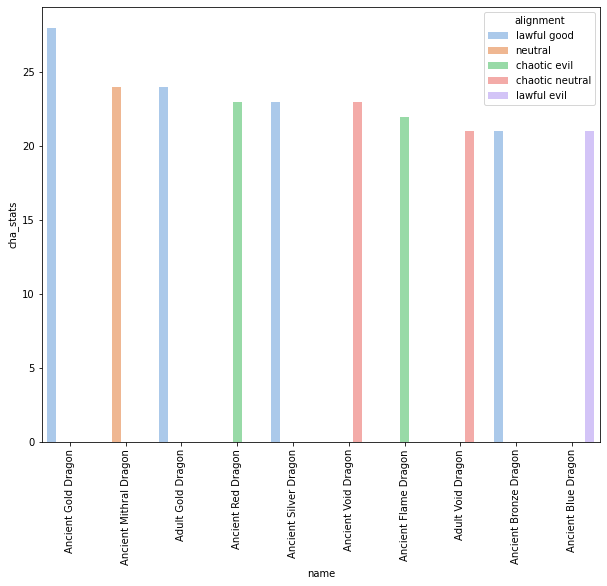

In [19]:
bar_plot(dragons_df.sort_values('cha_stats', ascending = False)[0:10],'name', 'cha_stats','alignment')

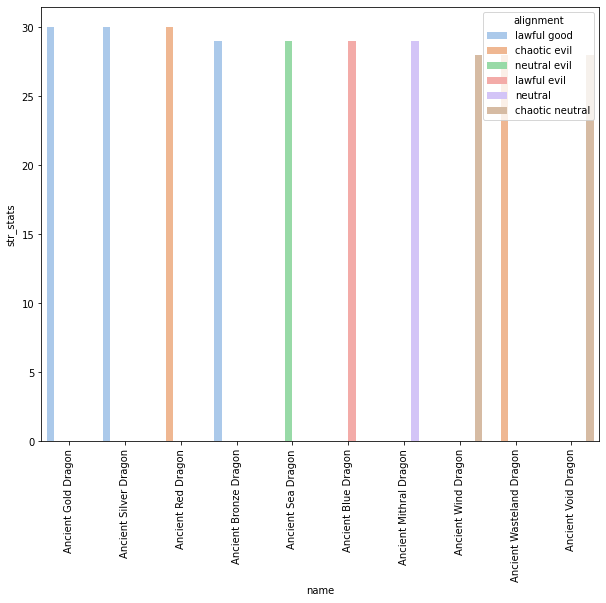

In [20]:
bar_plot(dragons_df.sort_values('str_stats', ascending = False)[0:10],'name', 'str_stats','alignment')

In [33]:
host_name = 'your host name'
username = 'your username'
passwd = 'your password'
db_name = 'your database name'
port_con = 'port to connect'
conn = None

In [27]:
conn = connect_to_db(host_name, username, passwd, db_name, port_con)

connected


In [28]:
curr = conn.cursor()

In [29]:
create_table(curr)

In [30]:
new_monster_df = update_db(curr, monster_df)

In [ ]:
append_to_db(curr,new_monster_df)

In [ ]:
conn.commit()

# 5. Conclusions

In this project, I explored the data that was extracted from the Open5e API, which contains informations about the Dungeons and Dragons 5th Ed. game, for this project I analysed the data for the monsters in D&D and did a pipeline process in which I extract the information using the api, save the dataframe in a file and uploaded the data using PostgreSQL on the AWS database that I created.

The main Idea of this project was to learn how to construct a pipeline process that would cover the whole process of extracting data from an api and upload it to a database using SQL queries and fetches. The upload and update of the database was made with care and seeking a great performance for data scalability even for data with millions of rows.


For the exploratory analysis the final conclusions are:
- In a standard world of D&D the probability to have a monster encounter with a  Medium size creature is higher than a Gargantuan one.
- There is a relation between size and strength for the creatures, the larger the creature the more powerful it is.
- The Hit points of a monster increases if we increase the challenge rating encounter.
- Both CR and Hit Points increases with the size of the creature.
- The most wised dragon is the Ancient Mithral.
- The most charismatic dragon is the Ancient Golden Dragon.
- For the strength we have a tie between the Ancient Dragon, the Ancient Silver Dragon and the Ancient Red Dragon.
- The Ancient Mithral dragon has high values in all three categories.



# 6. References:

The following sites was used as reference from different parts of this project:

[1] Open5e API. Avaiable at (https://api.open5e.com/)

[2] Thecreatures section at https://www.dandwiki.com/wiki/5e_Creatures

[3] Importing a Pandas Dataframe to a Database in Python [For Your Data Science Project]. https://www.youtube.com/watch?v=77IVf0zgmwI&t